In [1]:
! pip install transformers

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('New-Microsoft-Excel-Worksheet.csv')
data.head()

,Tcontent,class
0,Networks in the real world come in vari...,0
1,"In the tangible realm, networks take on divers...",1
2,Networks in the real world come in various big...,0
3,"In the realm of reality, networks manifest in ...",1
4,Such a complex network is found in the ...,0


In [5]:
data.shape

(447, 2)

In [6]:

data.isnull().sum()

Tcontent    0
class       0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

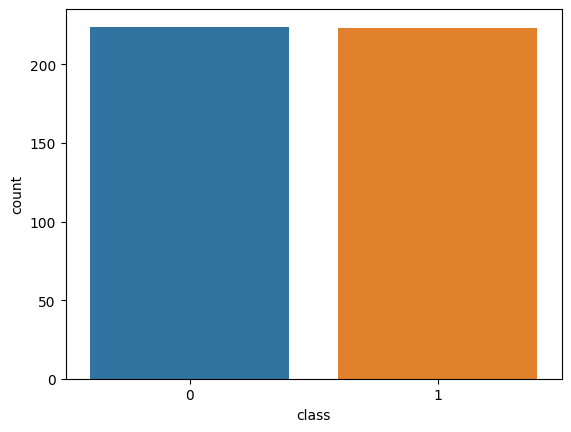

In [7]:

sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['Tcontent'],
                                                    data['class'],
                                                    test_size=0.3)

In [9]:
# Data Processing
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [10]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))


0.967948717948718


In [11]:
# testing the model

print(accuracy_score(y_test, model.predict(x_test)))

0.7777777777777778


In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))


0.9935897435897436


In [13]:
# testing the model

print(accuracy_score(y_test, model.predict(x_test)))

0.7407407407407407


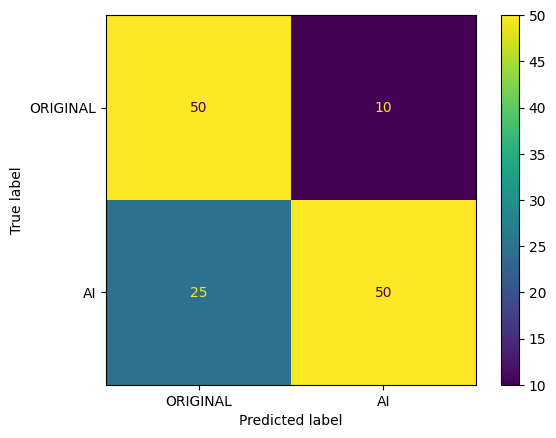

In [14]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=['ORIGINAL', 'AI'])

cm_display.plot()
plt.show()

Build model Using BERT


In [15]:
max_len=100
data_text=data["Tcontent"]
data_label=data["class"]

In [16]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [17]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [19]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [21]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [42]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)
maxlen=100
X_train_token
X_test_token

{'input_ids': <tf.Tensor: shape=(90, 100), dtype=int32, numpy=
array([[  101,  1999, 16012, ...,     0,     0,     0],
       [  101,  1045,  2052, ...,  2026,  2155,   102],
       [  101,  2511,  2011, ...,     0,     0,     0],
       ...,
       [  101,  2330,  2278, ...,     0,     0,     0],
       [  101,  2004,  7203, ...,     0,     0,     0],
       [  101,  2000,  3058, ...,  1024,  1528,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(90, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

In [60]:
from transformers import BertTokenizer, TFBertModel
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model

In [61]:
model=create_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_7[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_8[0][0]']             
                             hidden_state=(None, 100, 7                                           
                             68),                                                           

In [62]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model

# Define a learning rate schedule (you can choose an appropriate schedule)
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-05,
    decay_steps=20,  # Adjust the decay steps as needed
    decay_rate=0.01,
)

# Create the Adam optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule, epsilon=1e-08, clipnorm=1.0)

# Compile your model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,
                                            baseline=0.4,min_delta=0.0001,restore_best_weights=False)
callback

In [64]:
history = model.fit(x = {'input_7':X_train_token['input_ids'],'input_8':X_train_token['attention_mask']},
                    y = Y_train, epochs=100, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/100
10/10 [==============================] - 105s 1s/step - loss: 0.5742 - accuracy: 0.6982 - val_loss: 0.4688 - val_accuracy: 0.8472
Epoch 2/100
10/10 [==============================] - 7s 690ms/step - loss: 0.4092 - accuracy: 0.8877 - val_loss: 0.4470 - val_accuracy: 0.8472
Epoch 3/100
10/10 [==============================] - 7s 721ms/step - loss: 0.4401 - accuracy: 0.8386 - val_loss: 0.4444 - val_accuracy: 0.8472
Epoch 4/100
10/10 [==============================] - 7s 692ms/step - loss: 0.4172 - accuracy: 0.8561 - val_loss: 0.4441 - val_accuracy: 0.8472
Epoch 5/100
10/10 [==============================] - 8s 770ms/step - loss: 0.4002 - accuracy: 0.8667 - val_loss: 0.4441 - val_accuracy: 0.8472
Epoch 6/100
10/10 [==============================] - 7s 700ms/step - loss: 0.3913 - accuracy: 0.8737 - val_loss: 0.4441 - val_accuracy: 0.8472
Epoch 7/100
10/10 [==============================] - 7s 697ms/step - loss: 0.4126 - accuracy: 0.8772 - val_loss: 0.4441 - val_accuracy: 0.8472


In [65]:
from matplotlib import pyplot as plt

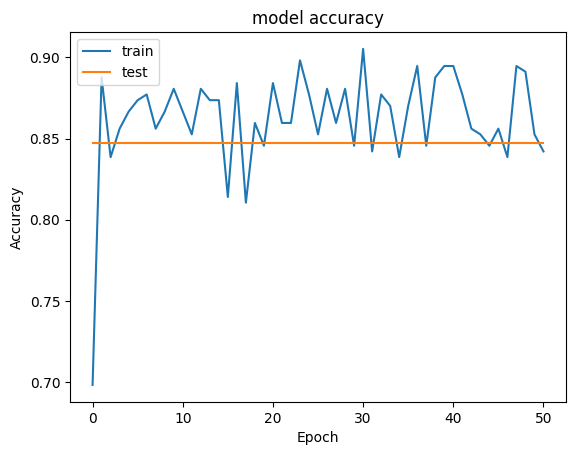

In [67]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

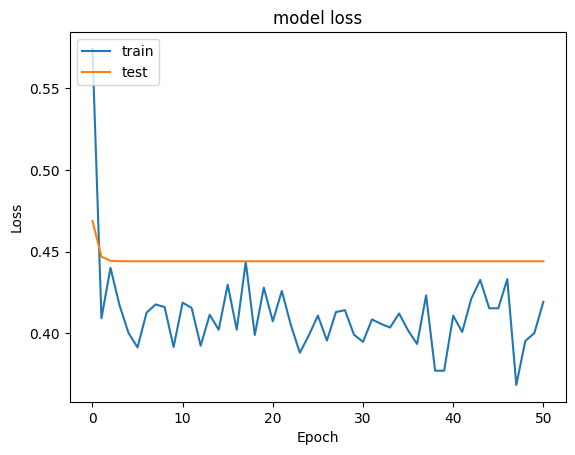

In [68]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
import numpy as np
y_pred = np.where(model.predict({ 'input_7' : X_test_token['input_ids'] , 'input_8' : X_test_token['attention_mask']}) >=0.5,1,0)
y_pred

3/3 [==============================] - 5s 228ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

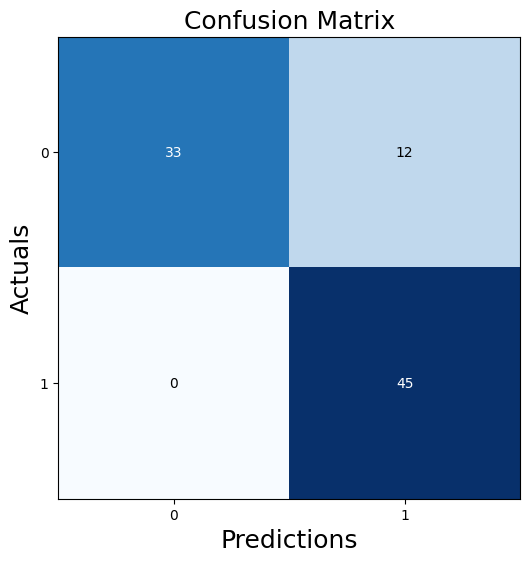

In [71]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [72]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        45
           1       0.79      1.00      0.88        45

    accuracy                           0.87        90
   macro avg       0.89      0.87      0.86        90
weighted avg       0.89      0.87      0.86        90



  **Customize data test or knowledge representaion**


In [73]:
test_text= "An  equalizer  is  an  apparatus  to  revise  frequency properties. This is used to make a sound to expect by music  production.  There  are  two  kind  equalizers:  a graphic equalizer and a parametric equalizer. A graphic  equalizer  is  fixed  a  central  frequency, bandwidth and Q (explain  below) to control. We can attenuate  and  amplify  specific  frequency  bands. There  are  multiple  frequency  bands  that  we  can control."

In [74]:
test_token = tokenize(test_text)
test_token

{'input_ids': <tf.Tensor: shape=(437, 100), dtype=int32, numpy=
array([[ 101, 1037,  102, ...,    0,    0,    0],
       [ 101, 1050,  102, ...,    0,    0,    0],
       [ 101,  102,    0, ...,    0,    0,    0],
       ...,
       [ 101, 1051,  102, ...,    0,    0,    0],
       [ 101, 1048,  102, ...,    0,    0,    0],
       [ 101, 1012,  102, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(437, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [76]:
test_text_pred = np.where(model.predict({ 'input_7' : test_token['input_ids'] , 'input_8' : test_token['attention_mask']}) >=0.5,1,0)

14/14 [==============================] - 3s 224ms/step


In [77]:
test_text_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [78]:
if(test_text_pred[0]==0):
    print("It is orginal")
else:
    print("It is AI generated")

It is orginal
